# Compare masses:
   * **catalog mass**: from particle data
   * **postage mass**: summed pixels mass map
   * **1D mass**: from surface brightness profile fit
   * **2D mass**: summed pixels within 30kpc aperture

In [32]:
%matplotlib inline 
%load_ext autoreload 
%autoreload 2

import numpy as np


import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rc('text', usetex=True)
plt.rcParams.update({'figure.autolayout': True})

import pickle


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
#open pickels
illustris_pickle='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris.pkl'
tng_pickle='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG.pkl'

pkl = open(illustris_pickle,'rb')  
illustris = pickle.load(pkl)  
pkl.close()

pkl = open(tng_pickle,'rb')  
tng = pickle.load(pkl)  
pkl.close()

In [3]:
def get_masses(array):
    cat_masses=np.array([i[1] for i in array])
    postage_masses=np.array([i[2] for i in array])
    oned_masses=np.array([i[0]['mag_tot'][0]/-2.5 for i in array])
    twod_masses=np.array([i[3] for i in array])
    
    return [cat_masses, postage_masses, oned_masses, twod_masses]

In [4]:
# def find_nearest(array,value):
#     idx = (np.abs(array-value)).argmin()
#     return idx

# def oneD_mass(galaxy_iso, radius):
#     index=find_nearest(galaxy_iso['sma'],radius)
#     #return np.log10(np.sum(10**(galaxy['sbp_cor'][:index]/-2.5))*radius)
#     return np.log10(galaxy_iso['growth_ori'][index])

def oneD_mass(galaxy_iso, radius):
    mass=np.interp(radius,galaxy_iso['sma'], galaxy_iso['growth_ori'])
    return np.log10(mass)

# Illustris

In [37]:
masses_illustris = get_masses(illustris)

In [40]:
isos_illustris=[i[0] for i in illustris]
illustris_1d_masses_30kpc = [oneD_mass(iso,30) for iso in isos_illustris]

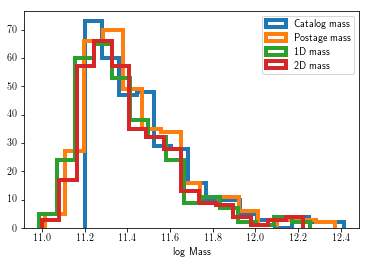

In [5]:
plt.hist(masses_illustris[0], bins=15, histtype='step', linewidth=4, label='Catalog mass')
plt.hist(masses_illustris[1], bins=15, histtype='step', linewidth=4, label='Postage mass')
plt.hist(masses_illustris[2], bins=15, histtype='step', linewidth=4, label='1D mass')
plt.hist(masses_illustris[3], bins=15, histtype='step', linewidth=4, label='2D mass')

plt.legend()
plt.xlabel('log Mass')
plt.show()

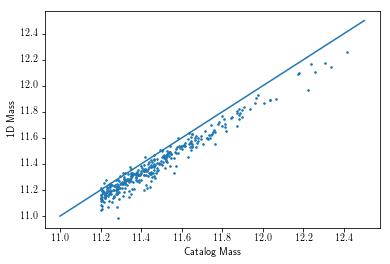

In [6]:
#mass vs. mass
plt.scatter(masses_illustris[0],masses_illustris[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass')
plt.show()

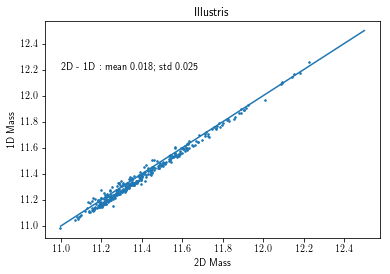

In [31]:
plt.scatter(masses_illustris[3],masses_illustris[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('2D Mass')
plt.ylabel('1D Mass')
plt.text(11,12.2,'2D - 1D : mean ' +str(round(np.mean(illustris_diff_2d_1d),3))+\
         '; std '+str(round(np.std(illustris_diff_2d_1d),3)))
plt.title('Illustris')
plt.show()

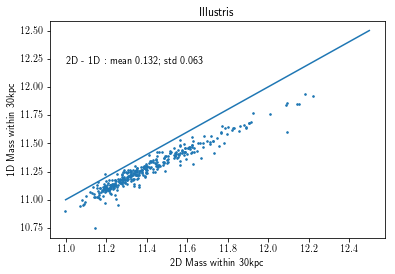

In [46]:
illustris_diff_2d_1d30kpc=masses_illustris[3]-illustris_1d_masses_30kpc

plt.scatter(masses_illustris[3],illustris_1d_masses_30kpc, marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('2D Mass within 30kpc')
plt.ylabel('1D Mass within 30kpc')
plt.text(11,12.2,'2D - 1D : mean ' +str(round(np.mean(illustris_diff_2d_1d30kpc),3))+\
         '; std '+str(round(np.std(illustris_diff_2d_1d30kpc),3)))
plt.title('Illustris')
plt.show()

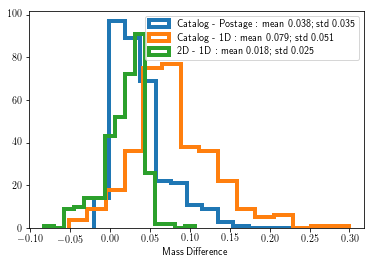

In [47]:
# differences
illustris_diff_cat_post=masses_illustris[0]-masses_illustris[1]
illustris_diff_cat_1d=masses_illustris[0]-masses_illustris[2]
illustris_diff_2d_1d=masses_illustris[3]-masses_illustris[2]

plt.hist(illustris_diff_cat_post, bins=15, histtype='step', linewidth=4,
         label='Catalog - Postage : mean ' +str(round(np.mean(illustris_diff_cat_post),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_post),3)))
plt.hist(illustris_diff_cat_1d, bins=15, histtype='step', linewidth=4,
         label='Catalog - 1D : mean ' +str(round(np.mean(illustris_diff_cat_1d),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_1d),3)))
plt.hist(illustris_diff_2d_1d, bins=15, histtype='step', linewidth=4,
         label='2D - 1D : mean ' +str(round(np.mean(illustris_diff_2d_1d),3))+\
         '; std '+str(round(np.std(illustris_diff_2d_1d),3)))

plt.legend()
plt.xlabel('Mass Difference')
plt.show()

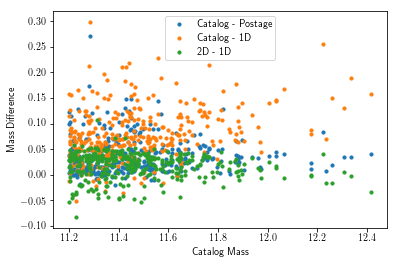

In [9]:
plt.scatter(masses_illustris[0],illustris_diff_cat_post, s=10, label='Catalog - Postage')
plt.scatter(masses_illustris[0],illustris_diff_cat_1d, s=10, label='Catalog - 1D')

plt.scatter(masses_illustris[0],illustris_diff_2d_1d, s=10, label='2D - 1D')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()

In [12]:
bins_cat= np.linspace(11.2, 12.5, 10)
db=(bins_cat[1]-bins_cat[0])/2.
bin_centers=bins_cat[:-1]+ db

#assign each mass to a bin
digitized = np.digitize(masses_illustris[0], bins_cat)

#means
bin_means_illustris_diff_cat_post = np.array([illustris_diff_cat_post[digitized == i].mean() for i in range(1,len(bins_cat))])
bin_means_illustris_diff_cat_1d = np.array([illustris_diff_cat_1d[digitized == i].mean() for i in range(1, len(bins_cat))])

#stds
bin_std_illustris_diff_cat_post = np.array([illustris_diff_cat_post[digitized == i].std() for i in range(1, len(bins_cat))])
bin_std_illustris_diff_cat_1d = np.array([illustris_diff_cat_1d[digitized == i].std() for i in range(1, len(bins_cat))])

# #change format to make plots of width
# new_bins=[]
# new_means_diff_cat_sum=[]
# for i, bini in enumerate(bin_centers):
#     new_bins.append(bini-db)
#     new_bins.append(bini)
#     new_bins.append(bini+db)
    
#     #append 3 times
#     new_means_diff_cat_sum.append(bin_means_illustris_diff_cat_sum[i])
#     new_means_diff_cat_sum.append(bin_means_illustris_diff_cat_sum[i])
#     new_means_diff_cat_sum.append(bin_means_illustris_diff_cat_sum[i])

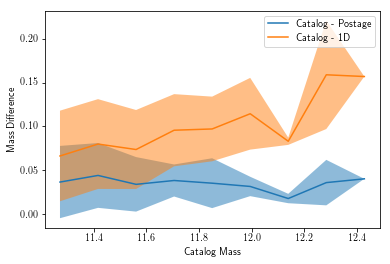

In [24]:
#plot
plt.plot(bin_centers,bin_means_illustris_diff_cat_post, label='Catalog - Postage')
plt.plot(bin_centers,bin_means_illustris_diff_cat_1d, label='Catalog - 1D')

plt.fill_between(bin_centers,bin_means_illustris_diff_cat_post-bin_std_illustris_diff_cat_post,
                bin_means_illustris_diff_cat_post+bin_std_illustris_diff_cat_post, alpha=0.5)
plt.fill_between(bin_centers,bin_means_illustris_diff_cat_1d-bin_std_illustris_diff_cat_1d,
                bin_means_illustris_diff_cat_1d+bin_std_illustris_diff_cat_1d, alpha=0.5)

# plt.scatter(masses_illustris[0],illustris_diff_cat_sum, s=10, label='Catalog - Sum')
# plt.scatter(masses_illustris[0],illustris_diff_cat_fit, s=10, label='Catalog - Fit')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()

# TNG

In [15]:
masses_tng = get_masses(tng)

In [42]:
isos_tng=[i[0] for i in tng]
tng_1d_masses_30kpc = [oneD_mass(iso,30) for iso in isos_tng]

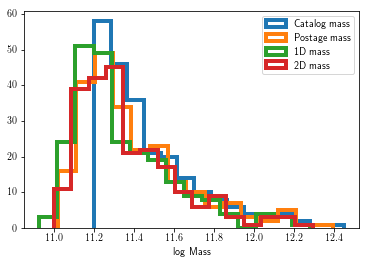

In [16]:
plt.hist(masses_tng[0], bins=15, histtype='step', linewidth=4, label='Catalog mass')
plt.hist(masses_tng[1], bins=15, histtype='step', linewidth=4, label='Postage mass')
plt.hist(masses_tng[2], bins=15, histtype='step', linewidth=4, label='1D mass')
plt.hist(masses_tng[3], bins=15, histtype='step', linewidth=4, label='2D mass')

plt.legend()
plt.xlabel('log Mass')
plt.show()

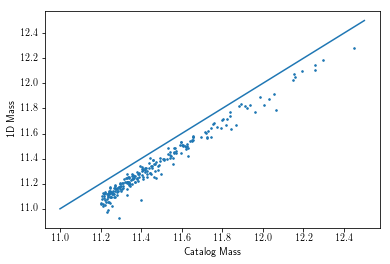

In [18]:
#mass vs. mass
plt.scatter(masses_tng[0],masses_tng[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass')
plt.show()

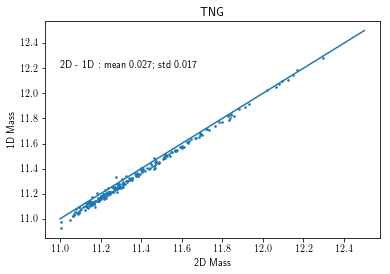

In [32]:
#mass vs. mass
plt.scatter(masses_tng[3],masses_tng[2], marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('2D Mass')
plt.ylabel('1D Mass')
plt.text(11,12.2,'2D - 1D : mean ' +str(round(np.mean(tng_diff_2d_1d),3))+\
         '; std '+str(round(np.std(tng_diff_2d_1d),3)))
plt.title('TNG')
plt.show()

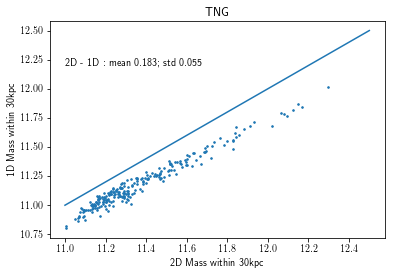

In [45]:
tng_diff_2d_1d30kpc=masses_tng[3]-tng_1d_masses_30kpc

plt.scatter(masses_tng[3],tng_1d_masses_30kpc, marker='.', s=10)
plt.plot([11,12.5],[11,12.5])
plt.xlabel('2D Mass within 30kpc')
plt.ylabel('1D Mass within 30kpc')
plt.text(11,12.2,'2D - 1D : mean ' +str(round(np.mean(tng_diff_2d_1d30kpc),3))+\
         '; std '+str(round(np.std(tng_diff_2d_1d30kpc),3)))
plt.title('TNG')
plt.show()

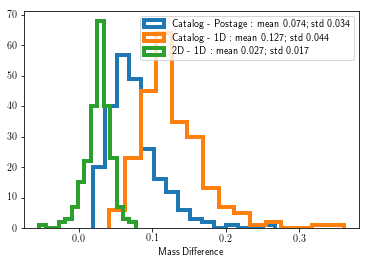

In [21]:
# differences
tng_diff_cat_post=masses_tng[0]-masses_tng[1]
tng_diff_cat_1d=masses_tng[0]-masses_tng[2]
tng_diff_2d_1d=masses_tng[3]-masses_tng[2]

plt.hist(tng_diff_cat_post, bins=15, histtype='step', linewidth=4,
         label='Catalog - Postage : mean ' +str(round(np.mean(tng_diff_cat_post),3))+\
         '; std '+str(round(np.std(tng_diff_cat_post),3)))
plt.hist(tng_diff_cat_1d, bins=15, histtype='step', linewidth=4,
         label='Catalog - 1D : mean ' +str(round(np.mean(tng_diff_cat_1d),3))+\
         '; std '+str(round(np.std(tng_diff_cat_1d),3)))
plt.hist(tng_diff_2d_1d, bins=15, histtype='step', linewidth=4,
         label='2D - 1D : mean ' +str(round(np.mean(tng_diff_2d_1d),3))+\
         '; std '+str(round(np.std(tng_diff_2d_1d),3)))

plt.legend()
plt.xlabel('Mass Difference')
plt.show()

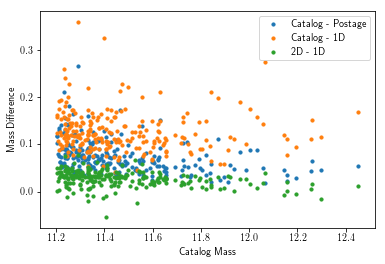

In [22]:
plt.scatter(masses_tng[0],tng_diff_cat_post, s=10, label='Catalog - Postage')
plt.scatter(masses_tng[0],tng_diff_cat_1d, s=10, label='Catalog - 1D')
plt.scatter(masses_tng[0],tng_diff_2d_1d, s=10, label='2D - 1D')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()

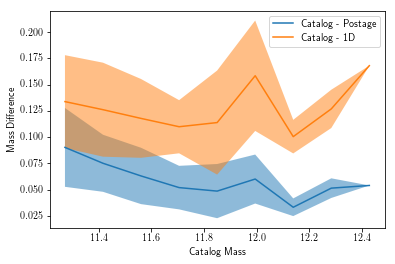

In [23]:
bins_cat= np.linspace(11.2, 12.5, 10)
db=(bins_cat[1]-bins_cat[0])/2.
bin_centers=bins_cat[:-1]+ db

#assign each mass to a bin
digitized = np.digitize(masses_tng[0], bins_cat)

#means
bin_means_tng_diff_cat_post = np.array([tng_diff_cat_post[digitized == i].mean() for i in range(1,len(bins_cat))])
bin_means_tng_diff_cat_1d = np.array([tng_diff_cat_1d[digitized == i].mean() for i in range(1, len(bins_cat))])

#stds
bin_std_tng_diff_cat_post = np.array([tng_diff_cat_post[digitized == i].std() for i in range(1, len(bins_cat))])
bin_std_tng_diff_cat_1d = np.array([tng_diff_cat_1d[digitized == i].std() for i in range(1, len(bins_cat))])

#plot
plt.plot(bin_centers,bin_means_tng_diff_cat_post, label='Catalog - Postage')
plt.plot(bin_centers,bin_means_tng_diff_cat_1d, label='Catalog - 1D')

plt.fill_between(bin_centers,bin_means_tng_diff_cat_post-bin_std_tng_diff_cat_post,
                bin_means_tng_diff_cat_post+bin_std_tng_diff_cat_post, alpha=0.5)
plt.fill_between(bin_centers,bin_means_tng_diff_cat_1d-bin_std_tng_diff_cat_1d,
                bin_means_tng_diff_cat_1d+bin_std_tng_diff_cat_1d, alpha=0.5)

# plt.scatter(masses_tng[0],tng_diff_cat_post, s=10, label='Catalog - post')
# plt.scatter(masses_tng[0],tng_diff_cat_1d, s=10, label='Catalog - 1d')

plt.legend()
plt.xlabel('Catalog Mass')
plt.ylabel('Mass Difference')
plt.show()

### check pickles

In [5]:
#open pickels
illustris_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_masses.pkl'
illustris_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/Illustris/Illustris_isos.pkl'

tng_masses_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_masses.pkl'
tng_isos_file='/Users/fardila/Documents/GitHub/HSC_vs_hydro/Data/TNG/TNG_isos.pkl'

def open_pkl(file_name):
    pkl = open(file_name,'rb')
    array = pickle.load(pkl)
    pkl.close()  
    return array

illustris_masses = open_pkl(illustris_masses_file)
illustris_isos = open_pkl(illustris_isos_file)


In [6]:
#masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10, m_2d_30, m_2d_100, extrap_mass]
illustris_m_cat =  np.array([gal[0] for gal in illustris_masses])
illustris_m_post =  np.array([gal[1] for gal in illustris_masses])
illustris_m_post_icl =  np.array([gal[2] for gal in illustris_masses])
illustris_m_1d_30 = np.array([gal[4] for gal in illustris_masses])
illustris_m_1d_100 = np.array([gal[5] for gal in illustris_masses])
illustris_m_2d_30 = np.array([gal[7] for gal in illustris_masses])
illustris_m_2d_100 = np.array([gal[8] for gal in illustris_masses])
illustris_m_extrap = np.array([gal[9] for gal in illustris_masses])


#for paper: 
illustris_diff_cat_post = illustris_m_cat-illustris_m_post
illustris_diff_cat_post_icl = illustris_m_cat-illustris_m_post_icl
illustris_diff_cat_1d100 = illustris_m_cat-illustris_m_1d_100
illustris_diff_2d_1d_30 = illustris_m_2d_30-illustris_m_1d_30
illustris_diff_2d_1d_100 = illustris_m_2d_100-illustris_m_1d_100
illustris_diff_cat_1dextrap = illustris_m_cat-illustris_m_extrap

#mask out failed mass measurements
illustris_diff_cat_post = illustris_diff_cat_post[illustris_diff_cat_post<100]
illustris_diff_cat_post_icl = illustris_diff_cat_post_icl[illustris_diff_cat_post_icl<100]
illustris_diff_cat_1d100 = illustris_diff_cat_1d100[illustris_diff_cat_1d100<100]
illustris_diff_2d_1d_30 = illustris_diff_2d_1d_30[illustris_diff_2d_1d_30<100]
illustris_diff_cat_1dextrap = illustris_diff_cat_1dextrap[illustris_diff_cat_1dextrap<100]

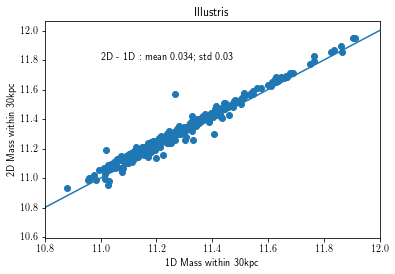

In [7]:
plt.scatter(illustris_m_1d_30, illustris_m_2d_30)
plt.plot([10.8,12.],[10.8,12.])
plt.xlabel('1D Mass within 30kpc')
plt.ylabel('2D Mass within 30kpc')
plt.text(11,11.8,'2D - 1D : mean ' +str(round(np.mean(illustris_diff_2d_1d_30),3))+\
         '; std '+str(round(np.std(illustris_diff_2d_1d_30),3)))

plt.title('Illustris')
plt.xlim([10.8,12.0])
plt.show()

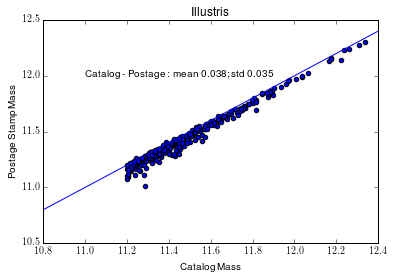

In [8]:
plt.scatter(illustris_m_cat, illustris_m_post)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('Postage Stamp Mass')
plt.text(11,12.0,'Catalog - Postage : mean ' +str(round(np.mean(illustris_diff_cat_post),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_post),3)))

plt.title('Illustris')
plt.xlim([10.8,12.4])
plt.show()

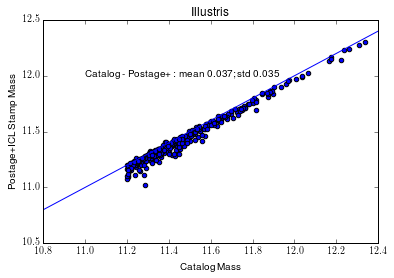

In [9]:
plt.scatter(illustris_m_cat, illustris_m_post_icl)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('Postage+ICL Stamp Mass')
plt.text(11,12.0,'Catalog - Postage+ : mean ' +str(round(np.mean(illustris_diff_cat_post_icl),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_post_icl),3)))

plt.title('Illustris')
plt.xlim([10.8,12.4])
plt.show()

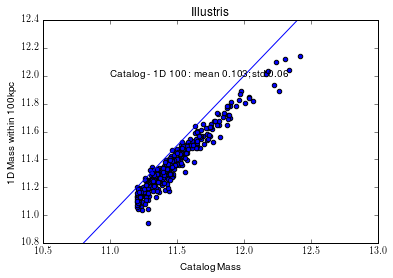

In [10]:
plt.scatter(illustris_m_cat, illustris_m_1d_100)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass within 100kpc')
plt.text(11,12.0,'Catalog - 1D 100 : mean ' +str(round(np.mean(illustris_diff_cat_1d100),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_1d100),3)))

plt.title('Illustris')
plt.ylim([10.8,12.4])
plt.show()

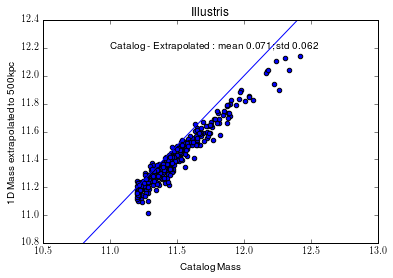

In [11]:
plt.scatter(illustris_m_cat, illustris_m_extrap)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass extrapolated to 500kpc')
plt.text(11,12.2,'Catalog - Extrapolated : mean ' +str(round(np.mean(illustris_diff_cat_1dextrap),3))+\
         '; std '+str(round(np.std(illustris_diff_cat_1dextrap),3)))

plt.title('Illustris')
plt.ylim([10.8,12.4])
plt.show()

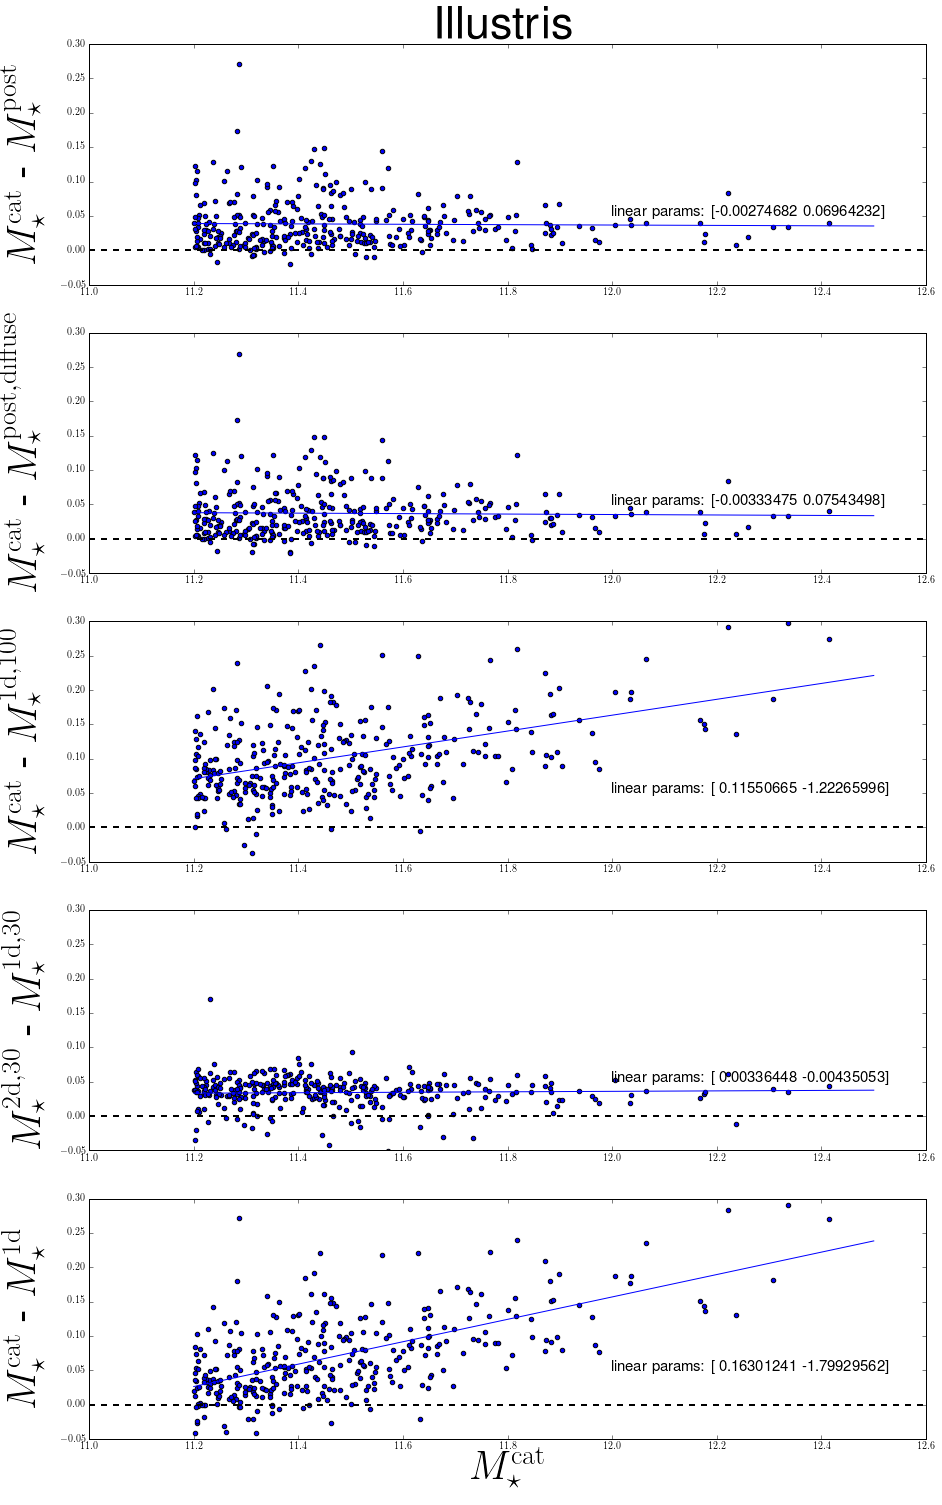

In [47]:
"""- plot 1:  M_cat  versus (M_cat - M100) with a line indicating the best fit linear relation of the difference (how much mass is missed)
- plot 2: M_cat versus (M_cat - M_extrapolated)"""
-

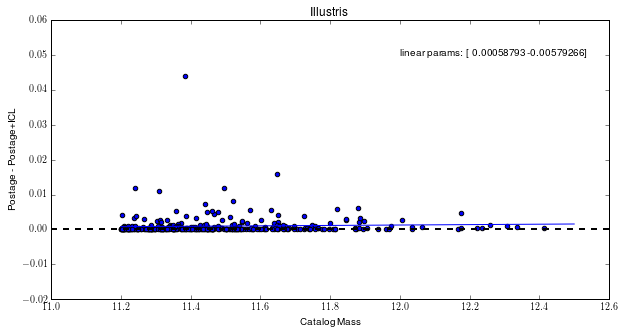

In [39]:
illustris_diff_post_post_icl = illustris_m_post_icl-illustris_m_post

#fit lines
xs=np.linspace(11.2,12.5,100)
illustris_diff_post_post_icl_params = np.polyfit(illustris_m_cat[illustris_diff_post_post_icl<100], 
                                            illustris_diff_post_post_icl[illustris_diff_post_post_icl<100],1)
illustris_diff_post_post_icl_line = np.poly1d(illustris_diff_post_post_icl_params)


plt.figure(figsize=[10,5])
ax1 = plt.subplot()

ax1.scatter(illustris_m_cat[illustris_diff_post_post_icl<100], illustris_diff_post_post_icl[illustris_diff_post_post_icl<100])
ax1.plot(xs, illustris_diff_post_post_icl_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
ax1.text(12, 0.05,'linear params: ' + str(illustris_diff_post_post_icl_params))
ax1.set_ylabel('Postage - Postage+ICL')


ax1.set_xlabel('Catalog Mass')
ax1.set_title('Illustris')

#ax1.set_ylim([-0.05,0.3])

# TNG 

In [9]:
tng_masses = open_pkl(tng_masses_file)
tng_isos = open_pkl(tng_isos_file)

In [10]:
#17 failed
# tng_masses[17]
tng_masses.pop(17)
len(tng_masses)

234

In [11]:
#masses = [m_cat, m_post, m_post_icl, m_1d_10, m_1d_30, m_1d_100, m_2d_10, m_2d_30, m_2d_100, extrap_mass]
tng_m_cat =  np.array([gal[0] for gal in tng_masses])
tng_m_post =  np.array([gal[1] for gal in tng_masses])
tng_m_post_icl =  np.array([gal[2] for gal in tng_masses])
tng_m_1d_30 = np.array([gal[4] for gal in tng_masses])
tng_m_1d_100 = np.array([gal[5] for gal in tng_masses])
tng_m_2d_30 = np.array([gal[7] for gal in tng_masses])
tng_m_2d_100 = np.array([gal[8] for gal in tng_masses])
tng_m_extrap = np.array([gal[9] for gal in tng_masses])


#for paper: 
tng_diff_cat_post = tng_m_cat-tng_m_post
tng_diff_cat_post_icl = tng_m_cat-tng_m_post_icl
tng_diff_cat_1d100 = tng_m_cat-tng_m_1d_100
tng_diff_2d_1d_30 = tng_m_2d_30-tng_m_1d_30
tng_diff_2d_1d_100 = tng_m_2d_100-tng_m_1d_100
tng_diff_cat_1dextrap = tng_m_cat-tng_m_extrap

#mask out failed mass measurements
tng_diff_cat_post = tng_diff_cat_post[tng_diff_cat_post<100]
tng_diff_cat_post_icl = tng_diff_cat_post_icl[tng_diff_cat_post_icl<100]
tng_diff_cat_1d100 = tng_diff_cat_1d100[tng_diff_cat_1d100<100]
tng_diff_2d_1d_30 = tng_diff_2d_1d_30[tng_diff_2d_1d_30<100]
tng_diff_cat_1dextrap = tng_diff_cat_1dextrap[tng_diff_cat_1dextrap<100]


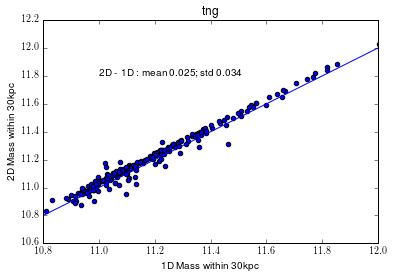

In [27]:
plt.scatter(tng_m_1d_30, tng_m_2d_30)
plt.plot([10.8,12.],[10.8,12.])
plt.xlabel('1D Mass within 30kpc')
plt.ylabel('2D Mass within 30kpc')
plt.text(11,11.8,'2D - 1D : mean ' +str(round(np.mean(tng_diff_2d_1d_30),3))+\
         '; std '+str(round(np.std(tng_diff_2d_1d_30),3)))

plt.title('tng')
plt.xlim([10.8,12.0])
plt.show()

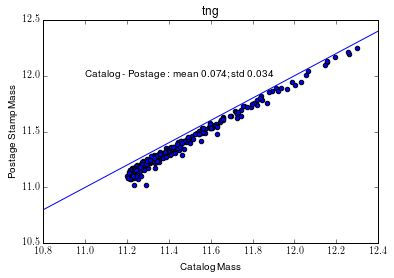

In [28]:
plt.scatter(tng_m_cat, tng_m_post)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('Postage Stamp Mass')
plt.text(11,12.0,'Catalog - Postage : mean ' +str(round(np.mean(tng_diff_cat_post),3))+\
         '; std '+str(round(np.std(tng_diff_cat_post),3)))

plt.title('tng')
plt.xlim([10.8,12.4])
plt.show()

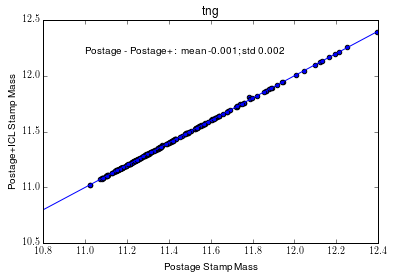

In [29]:
tng_diff_post_post_icl = tng_m_post - tng_m_post_icl
plt.scatter(tng_m_post, tng_m_post_icl)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Postage Stamp Mass')
plt.ylabel('Postage+ICL Stamp Mass')
plt.text(11,12.2,'Postage - Postage+ : mean ' +str(round(np.mean(tng_diff_post_post_icl),3))+\
         '; std '+str(round(np.std(tng_diff_post_post_icl),3)))

plt.title('tng')
plt.xlim([10.8,12.4])
plt.show()

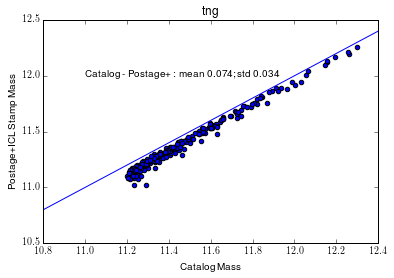

In [30]:
plt.scatter(tng_m_cat, tng_m_post_icl)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('Postage+ICL Stamp Mass')
plt.text(11,12.0,'Catalog - Postage+ : mean ' +str(round(np.mean(tng_diff_cat_post_icl),3))+\
         '; std '+str(round(np.std(tng_diff_cat_post_icl),3)))

plt.title('tng')
plt.xlim([10.8,12.4])
plt.show()

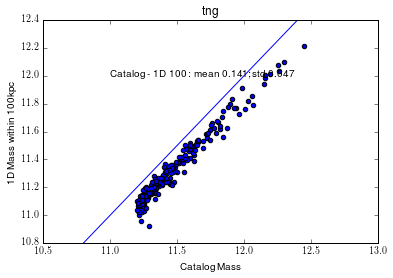

In [31]:
plt.scatter(tng_m_cat, tng_m_1d_100)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass within 100kpc')
plt.text(11,12.0,'Catalog - 1D 100 : mean ' +str(round(np.mean(tng_diff_cat_1d100),3))+\
         '; std '+str(round(np.std(tng_diff_cat_1d100),3)))

plt.title('tng')
plt.ylim([10.8,12.4])
plt.show()

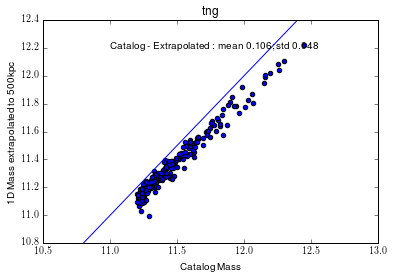

In [32]:
plt.scatter(tng_m_cat, tng_m_extrap)
plt.plot([10.8,12.4],[10.8,12.4])
plt.xlabel('Catalog Mass')
plt.ylabel('1D Mass extrapolated to 500kpc')
plt.text(11,12.2,'Catalog - Extrapolated : mean ' +str(round(np.mean(tng_diff_cat_1dextrap),3))+\
         '; std '+str(round(np.std(tng_diff_cat_1dextrap),3)))

plt.title('tng')
plt.ylim([10.8,12.4])
plt.show()

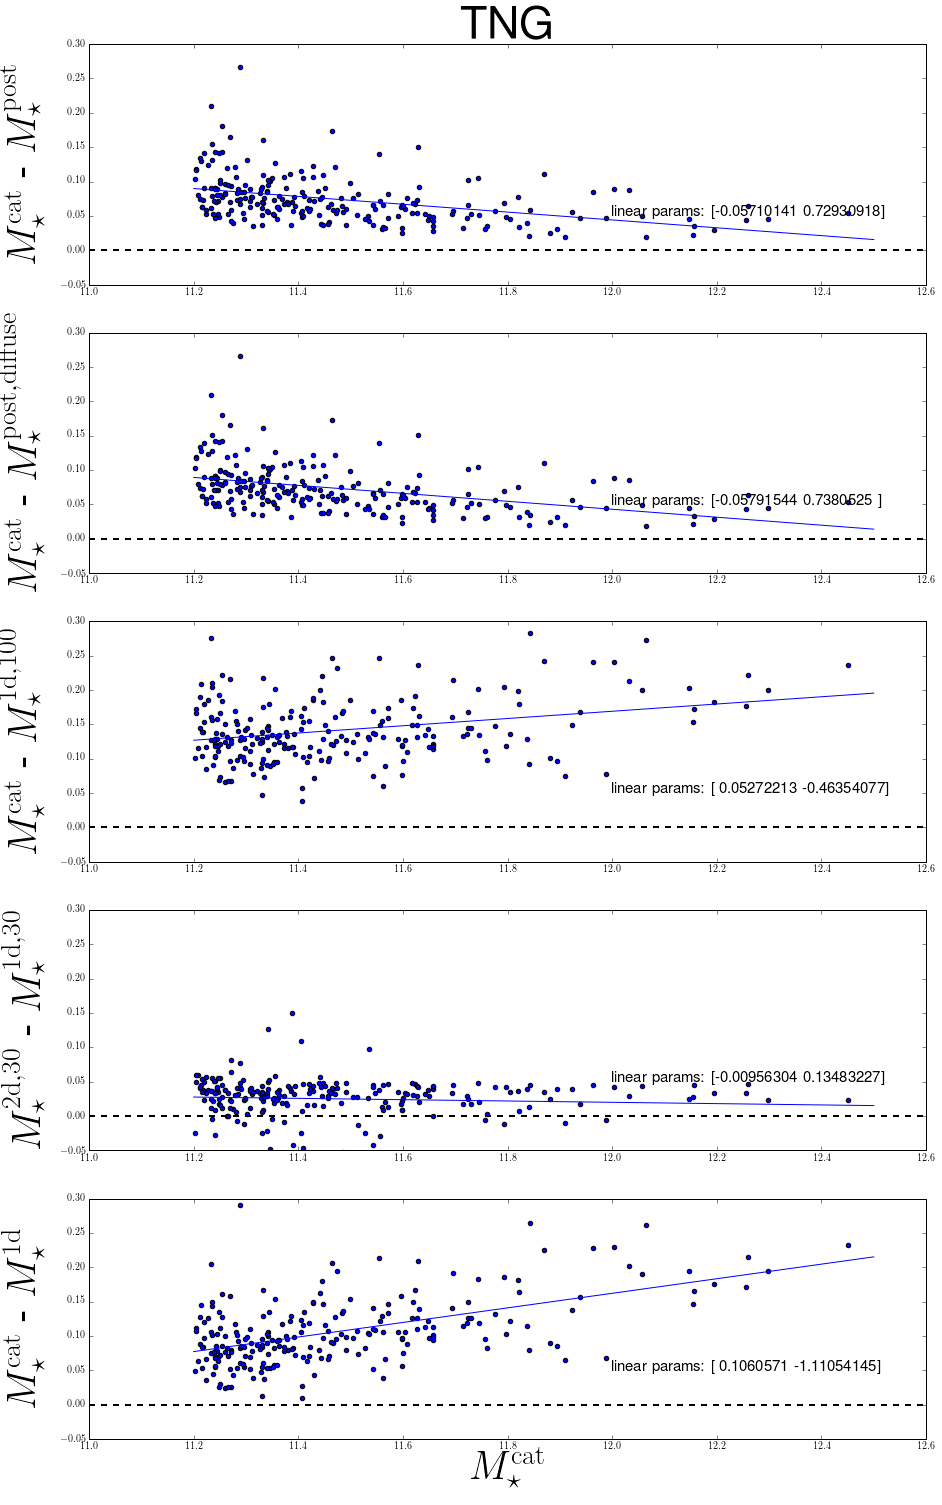

In [48]:
"""- plot 1:  M_cat  versus (M_cat - M100) with a line indicating the best fit linear relation of the difference (how much mass is missed)
- plot 2: M_cat versus (M_cat - M_extrapolated)"""

# tng_diff_cat_post
# tng_diff_cat_post_icl
# tng_diff_cat_1d100
# tng_diff_2d_1d_30
# tng_diff_cat_1dextrap

tng_diff_cat_post = tng_m_cat-tng_m_post
tng_diff_cat_post_icl = tng_m_cat-tng_m_post_icl
tng_diff_cat_1d100 = tng_m_cat-tng_m_1d_100
tng_diff_2d_1d_30 = tng_m_2d_30-tng_m_1d_30
tng_diff_cat_1dextrap = tng_m_cat-tng_m_extrap

#fit lines
xs=np.linspace(11.2,12.5,100)

tng_diff_cat_post_params = np.polyfit(tng_m_cat[tng_diff_cat_post<100], 
                                            tng_diff_cat_post[tng_diff_cat_post<100],1)
tng_diff_cat_post_line = np.poly1d(tng_diff_cat_post_params)
########################################################################
tng_diff_cat_post_icl_params = np.polyfit(tng_m_cat[tng_diff_cat_post_icl<100], 
                                                tng_diff_cat_post_icl[tng_diff_cat_post_icl<100], 1)
tng_diff_cat_post_icl_line = np.poly1d(tng_diff_cat_post_icl_params)
########################################################################
tng_diff_cat_1d100_params = np.polyfit(tng_m_cat[tng_diff_cat_1d100<100], 
                                                tng_diff_cat_1d100[tng_diff_cat_1d100<100], 1)
tng_diff_cat_1d100_line = np.poly1d(tng_diff_cat_1d100_params)
########################################################################
tng_diff_2d_1d_30_params = np.polyfit(tng_m_cat[tng_diff_2d_1d_30<100], 
                                                tng_diff_2d_1d_30[tng_diff_2d_1d_30<100], 1)
tng_diff_2d_1d_30_line = np.poly1d(tng_diff_2d_1d_30_params)
########################################################################
tng_diff_cat_1dextrap_params = np.polyfit(tng_m_cat[tng_diff_cat_1dextrap<100], 
                                                tng_diff_cat_1dextrap[tng_diff_cat_1dextrap<100], 1)
tng_diff_cat_1dextrap_line = np.poly1d(tng_diff_cat_1dextrap_params)

plt.figure(figsize=[15,25])
ax1=plt.subplot(511)
ax2=plt.subplot(512)
ax3=plt.subplot(513)
ax4=plt.subplot(514)
ax5=plt.subplot(515)


ax1.scatter(tng_m_cat[tng_diff_cat_post<100], tng_diff_cat_post[tng_diff_cat_post<100])
ax1.plot(xs, tng_diff_cat_post_line(xs))
ax1.axhline(0,c="k",linewidth=2,linestyle='--')
ax1.text(12, 0.05,'linear params: ' + str(tng_diff_cat_post_params), fontsize=15)
ax1.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post}}$', fontsize=40)

ax2.scatter(tng_m_cat[tng_diff_cat_post_icl<100], tng_diff_cat_post_icl[tng_diff_cat_post_icl<100])
ax2.plot(xs, tng_diff_cat_post_icl_line(xs))
ax2.axhline(0,c="k",linewidth=2,linestyle='--')
ax2.text(12, 0.05,'linear params: ' + str(tng_diff_cat_post_icl_params), fontsize=15)
ax2.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{post, diffuse}}$ ', fontsize=40)

ax3.scatter(tng_m_cat[tng_diff_cat_1d100<100], tng_diff_cat_1d100[tng_diff_cat_1d100<100])
ax3.plot(xs, tng_diff_cat_1d100_line(xs))
ax3.axhline(0, c="k",linewidth=2, linestyle='--')
ax3.text(12, 0.05,'linear params: ' + str(tng_diff_cat_1d100_params), fontsize=15)
ax3.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=40)

ax4.scatter(tng_m_cat[tng_diff_2d_1d_30<100], tng_diff_2d_1d_30[tng_diff_2d_1d_30<100])
ax4.plot(xs, tng_diff_2d_1d_30_line(xs))
ax4.axhline(0,c="k",linewidth=2,linestyle='--')
ax4.text(12, 0.05,'linear params: ' + str(tng_diff_2d_1d_30_params), fontsize=15)
ax4.set_ylabel(r'$M_{\star}^{\mathrm{2d, 30}}$ - $M_{\star}^{\mathrm{1d, 30}}$ ', fontsize=40)

ax5.scatter(tng_m_cat[tng_diff_cat_1dextrap<100], tng_diff_cat_1dextrap[tng_diff_cat_1dextrap<100])
ax5.plot(xs, tng_diff_cat_1dextrap_line(xs))
ax5.axhline(0,c="k",linewidth=2,linestyle='--')
ax5.text(12, 0.05,'linear params: ' + str(tng_diff_cat_1dextrap_params), fontsize=15)
ax5.set_ylabel(r'$M_{\star}^{\mathrm{cat}}$ - $M_{\star}^{\mathrm{1d}}$ ', fontsize=40)




ax5.set_xlabel('$M_{\star}^{\mathrm{cat}}$', fontsize=40)
ax1.set_title('TNG', fontsize=45)
#plt.tight_layout()

for ax in [ax1,ax2,ax3,ax4,ax5]:
    ax.set_ylim([-0.05,0.3])

# plot for paper

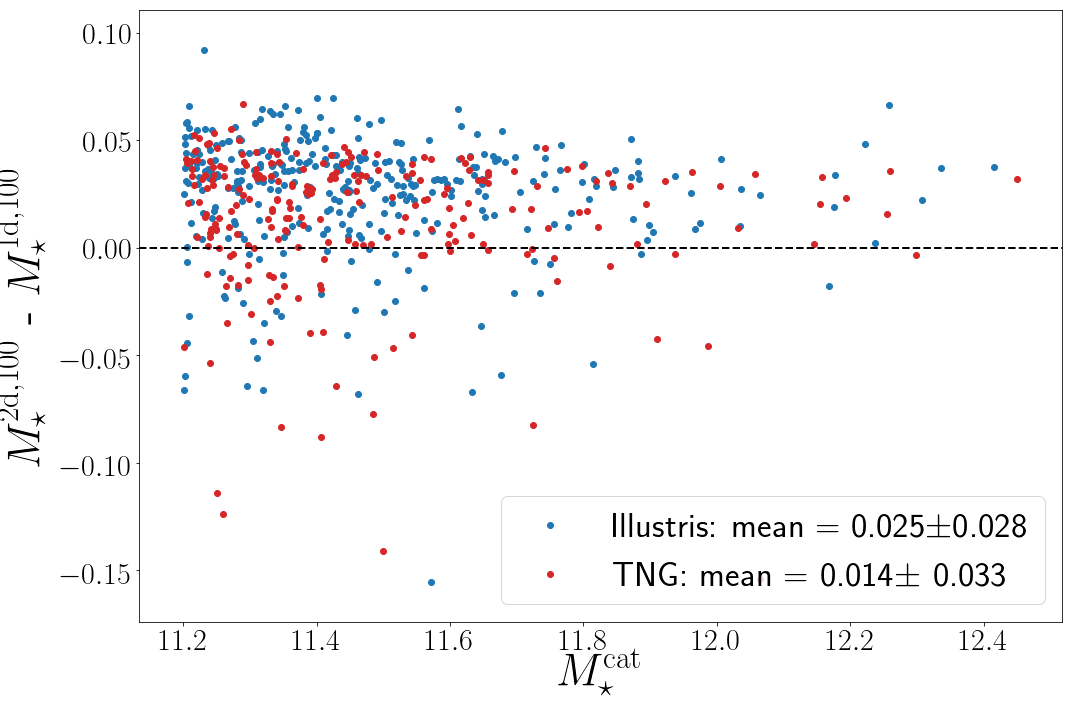

In [37]:
illustris_color='#1f77b4'
tng_color = '#d62728'

# #fit lines
# xs=np.linspace(11.2,12.5,100)
# illustris_diff_post_post_icl_params = np.polyfit(illustris_m_cat[illustris_diff_post_post_icl<100], 
#                                             illustris_diff_post_post_icl[illustris_diff_post_post_icl<100],1)
# illustris_diff_post_post_icl_line = np.poly1d(illustris_diff_post_post_icl_params)


plt.figure(figsize=[15,10])
#ax1 = plt.subplot()

plt.scatter(illustris_m_cat[illustris_diff_2d_1d_100 <100], illustris_diff_2d_1d_100[illustris_diff_2d_1d_100<100],
           label=r'Illustris: mean = ' +str(round(np.mean(illustris_diff_2d_1d_100[illustris_diff_2d_1d_100<100]),3))+\
            '$\pm $'+str(round(np.std(illustris_diff_2d_1d_100[illustris_diff_2d_1d_100<100]),3)), c=illustris_color)
plt.scatter(tng_m_cat[tng_diff_2d_1d_100 <100], tng_diff_2d_1d_100[tng_diff_2d_1d_100<100], c=tng_color,
            label=r'TNG: mean = ' +str(round(np.mean(tng_diff_2d_1d_100[tng_diff_2d_1d_100<100]),3))+\
            '$\pm $ '+str(round(np.std(tng_diff_2d_1d_100[tng_diff_2d_1d_100<100]),3)))

# ax1.plot(xs, illustris_diff_post_post_icl_line(xs))
plt.axhline(0,c="k",linewidth=2,linestyle='--')
plt.ylabel(r'$M_{\star}^{\mathrm{2d, 100}}$ - $M_{\star}^{\mathrm{1d, 100}}$ ', fontsize=45)
plt.xlabel(r'$M_{\star}^{\mathrm{cat}}$', fontsize=45)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)

plt.legend(loc='lower right', fontsize=35)

plt.savefig('/Users/fardila/Documents/GitHub/HSC_vs_hydro/Plots/2d-1d_masses.pdf', format='pdf' )
